In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import scipy.stats as sts
import random
from scipy.stats import sem
from collections import Counter


# Set the seed so our data is reproducible
random.seed(50)

In [15]:
ca_2019_data=pd.read_csv("output_census/census_ca_2019.csv")


In [16]:
ca_2019_data.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [17]:
filt=ca_2019_data[['House Value','Monthly Owner Cost', 'Monthly Rent']]>0
ca_2019_data=ca_2019_data[filt.all(1)]
ca_2019_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,90001,59832.0,29.1,43360.0,13727.0,25.496390,3.929335,359000.0,1949,1853.0,...,41.882270,8.921647,90.134042,0.315884,Los Angeles,Los Angeles County,33.970,-118.250,13788.0,CA
1,90002,53302.0,28.0,37285.0,13284.0,31.188323,4.110540,345900.0,1954,1813.0,...,42.973997,18.912986,78.886346,1.029980,Los Angeles,Los Angeles County,33.950,-118.250,12598.0,CA
2,90003,73730.0,28.3,40598.0,13441.0,29.959311,4.002441,362800.0,1954,1892.0,...,33.116777,20.676794,78.348027,0.297030,Los Angeles,Los Angeles County,33.960,-118.270,17127.0,CA
3,90004,60541.0,35.2,49675.0,32090.0,17.784642,2.685783,1063200.0,1946,3489.0,...,35.676649,3.614080,50.289886,25.465387,Los Angeles,Los Angeles County,34.080,-118.310,24278.0,CA
4,90005,39732.0,35.6,38491.0,24267.0,25.999195,3.289540,777100.0,1950,3149.0,...,23.336354,5.763616,49.481526,34.221786,Los Angeles,Los Angeles County,34.060,-118.310,16345.0,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,96145,2147.0,49.9,73875.0,47689.0,5.076851,0.000000,666300.0,1974,2419.0,...,96.413600,0.000000,2.095948,0.698649,Tahoe City,Placer County,39.187,-120.116,4764.0,CA
1758,96146,1145.0,43.8,76851.0,61141.0,3.930131,1.135371,911900.0,1981,2745.0,...,93.886463,0.000000,6.812227,0.000000,Olympic Valley,Placer County,39.180,-120.220,1726.0,CA
1759,96148,580.0,31.3,73611.0,28961.0,20.862069,0.000000,750000.0,1978,3375.0,...,100.000000,0.000000,38.103448,0.000000,Tahoe Vista,Placer County,39.240,-120.045,677.0,CA
1760,96150,29327.0,38.8,57396.0,35049.0,10.815972,3.808777,442300.0,1973,1953.0,...,83.943124,0.907014,25.277048,5.544379,South Lake Tahoe,El Dorado County,38.800,-120.100,21720.0,CA


### *box plot for House value and monthly rent in different counties in CA in 2019*

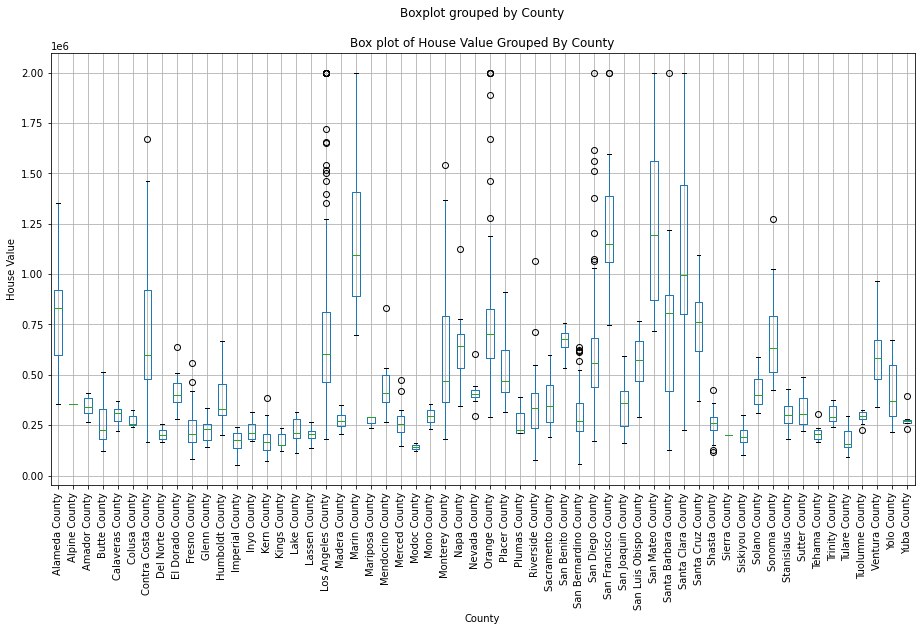

In [18]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Box plot of House Value Grouped By County')
ca_2019_data.boxplot(column=["House Value"], by='County', ax=ax)
plt.xticks(rotation=90)
plt.ylabel("House Value")
ax.set_title('Box plot of House Value Grouped By County')
plt.show()

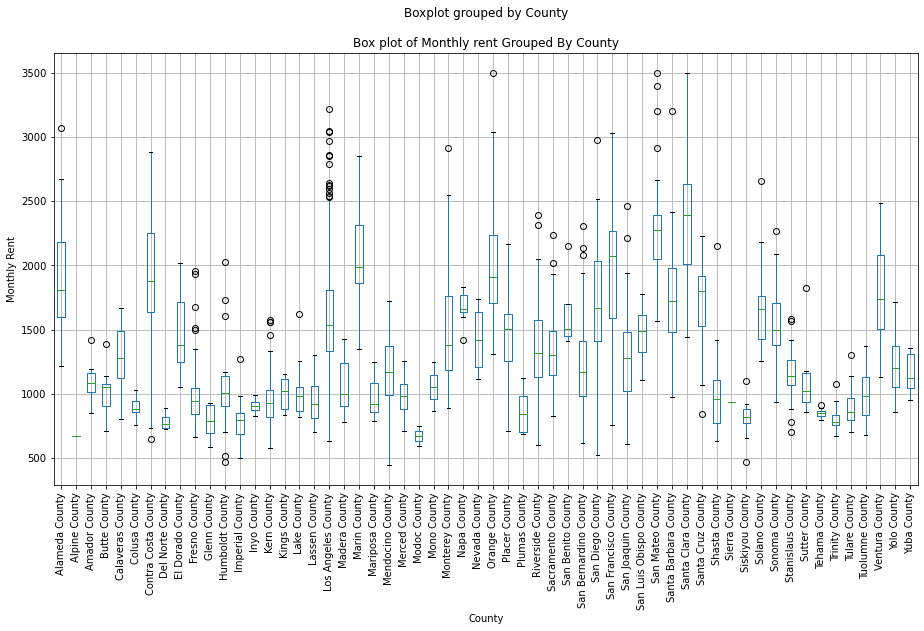

In [19]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Box plot of Monthly Rent Grouped By County')
ca_2019_data.boxplot(column=["Monthly Rent"], by='County', ax=ax)
plt.xticks(rotation=90)
plt.ylabel("Monthly Rent")
ax.set_title('Box plot of Monthly rent Grouped By County')
plt.show()

### *Taking Samples from CA-2019 data*

In [20]:
sample_set=[ca_2019_data.sample(200, axis=0) for x in range (0,10)]

### *Generating errorbar plot to see variation of house values*

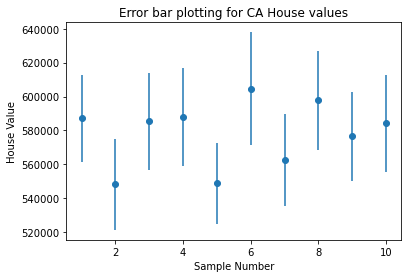

In [21]:
means=[sample["House Value"].mean() for sample in sample_set]
std_errors=[sem(sample["House Value"])for sample in sample_set]

x_axis=np.arange(0,len(sample_set),1)+1

fig,ax=plt.subplots()
ax.errorbar(x_axis,means,std_errors,fmt="o")
ax.set_xlabel("Sample Number")
ax.set_ylabel("House Value")
ax.set_title("Error bar plotting for CA House values")
plt.show()

### *Generating errorbar plot to see variation in Monthly Rent*

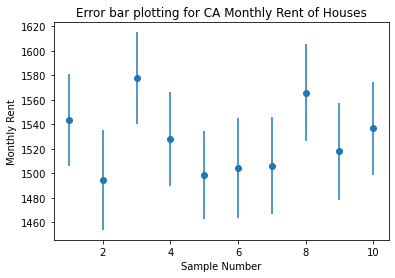

In [22]:
means=[sample["Monthly Rent"].mean() for sample in sample_set]
std_errors=[sem(sample["Monthly Rent"])for sample in sample_set]

x_axis=np.arange(0,len(sample_set),1)+1

fig,ax=plt.subplots()
ax.errorbar(x_axis,means,std_errors,fmt="o")
ax.set_xlabel("Sample Number")
ax.set_ylabel("Monthly Rent")
ax.set_title("Error bar plotting for CA Monthly Rent of Houses")
plt.show()

In [23]:
ca_2019_data.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [24]:
ca_data=ca_2019_data[["Population",'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate',"Housing_units"]]

In [25]:
ca_data_corr=ca_data.corr()
print(ca_data_corr.unstack().sort_values())

Public Transport Rate    Personal Transport Rate   -0.727316
Personal Transport Rate  Public Transport Rate     -0.727316
High School Rate         Monthly Owner Cost        -0.666636
Monthly Owner Cost       High School Rate          -0.666636
White Population Rate    Asian Population Rate     -0.663185
                                                      ...   
Uneducated Rate          Uneducated Rate            1.000000
White Population Rate    White Population Rate      1.000000
Black Population Rate    Black Population Rate      1.000000
Public Transport Rate    Public Transport Rate      1.000000
Housing_units            Housing_units              1.000000
Length: 441, dtype: float64


In [26]:
ca_data_corr.style.background_gradient(cmap='coolwarm')

,Population,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,Monthly Rent,Public Transport Rate,Personal Transport Rate,Commute Time Public,Commute Time Car,High School Rate,College Rate,Uneducated Rate,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Housing_units
Population,1.000000,0.074149,-0.106408,-0.067741,0.014868,0.053006,0.022573,0.123565,0.211153,0.184499,0.056704,0.523142,0.918987,-0.145082,-0.031644,0.303507,-0.476247,0.250952,0.317265,0.317442,0.933892
Household Income,0.074149,1.000000,0.018207,-0.062168,0.025888,0.052611,-0.001713,0.058325,0.046365,0.016106,0.011405,0.107123,0.054841,-0.038874,-0.047165,0.040802,-0.085057,0.034930,0.027793,0.045161,0.078124
Per Capita Income,-0.106408,0.018207,1.000000,-0.576376,-0.358102,0.866762,-0.010162,0.829898,0.720438,0.258760,-0.246472,0.143088,-0.158068,-0.611392,0.817699,-0.419178,0.152685,-0.139517,-0.586880,0.252449,0.039304
Poverty Rate,-0.067741,-0.062168,-0.576376,1.000000,0.470605,-0.495771,0.036174,-0.585237,-0.636639,-0.000933,-0.111250,-0.150479,-0.178295,0.340806,-0.571184,0.391062,-0.100783,0.148427,0.440857,-0.245088,-0.118511
Unemployment Rate,0.014868,0.025888,-0.358102,0.470605,1.000000,-0.314786,0.011848,-0.368345,-0.367424,-0.011688,-0.054569,-0.039722,-0.036269,0.178887,-0.345765,0.255123,-0.119428,0.147067,0.338259,-0.135604,-0.021863
House Value,0.053006,0.052611,0.866762,-0.495771,-0.314786,1.000000,-0.015010,0.909355,0.742997,0.340795,-0.305340,0.229483,-0.014578,-0.643422,0.739350,-0.237085,-0.056937,-0.082091,-0.406808,0.383142,0.156710
House Construction Year,0.022573,-0.001713,-0.010162,0.036174,0.011848,-0.015010,1.000000,-0.021602,-0.061284,0.003888,-0.005144,-0.050226,0.102281,0.013823,-0.017973,-0.019099,0.009285,0.011115,0.004363,-0.017918,0.025863
Monthly Owner Cost,0.123565,0.058325,0.829898,-0.585237,-0.368345,0.909355,-0.021602,1.000000,0.810405,0.373499,-0.286633,0.288391,0.054799,-0.666636,0.806400,-0.269226,-0.100054,-0.045797,-0.433700,0.438258,0.227982
Monthly Rent,0.211153,0.046365,0.720438,-0.636639,-0.367424,0.742997,-0.061284,0.810405,1.000000,0.210392,-0.097879,0.323918,0.200801,-0.631938,0.684912,-0.251535,-0.174846,-0.036723,-0.364615,0.515634,0.252110
Public Transport Rate,0.184499,0.016106,0.258760,-0.000933,-0.011688,0.340795,0.003888,0.373499,0.210392,1.000000,-0.727316,0.267551,-0.043978,-0.283980,0.330270,0.143847,-0.362841,0.242089,-0.066484,0.357881,0.249677


In [41]:
## reading csv files for older years

ca_data_2012=pd.read_csv("output_census/census_ca_2012.csv")
ca_data_2019=pd.read_csv("output_census/census_ca_2019.csv")
ca_data_2014=pd.read_csv("output_census/census_ca_2014.csv")
ca_data_2015=pd.read_csv("output_census/census_ca_2015.csv")
ca_data_2017=pd.read_csv("output_census/census_ca_2017.csv")

In [68]:
## mearging each year data for plotting

merge1=pd.merge(ca_data_2019,ca_data_2017,how="inner",left_on=['Lat', 'Lng'],right_on=['Lat', 'Lng'],suffixes=("2019","2017"))


In [43]:
merge1=merge1[['Zipcode2019','City2019','County2019','Lat', 'Lng',
               'House Value2019','House Construction Year2019', 'Monthly Owner Cost2019',
               'Monthly Rent2019', 'House Value2017','House Construction Year2017',
               'Monthly Owner Cost2017','Monthly Rent2017']]

In [44]:
merge1.rename(columns={"Zipcode2019":"Zipcode","City2019":"City","County2019":"County"},inplace=True)

In [67]:
merge2=pd.merge(merge1,ca_data_2015,how="inner",left_on=['Lat','Lng'],right_on=['Lat','Lng']) 


In [46]:
merge2=merge2[['Zipcode_x', 'City_x', 'County_x', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value', 'House Construction Year',
       'Monthly Owner Cost', 'Monthly Rent']]

In [47]:
merge2.rename(columns={"Zipcode_x":"Zipcode", 'City_x':"City", 'County_x':"County",
                      'House Value':"House Value2015", 'House Construction Year':'House Construction Year2015',
       'Monthly Owner Cost':'Monthly Owner Cost2015', 'Monthly Rent':'Monthly Rent2015'},inplace=True)

In [66]:
merge3=pd.merge(merge2,ca_data_2014,how="inner",left_on=['Lat','Lng'],right_on=['Lat','Lng']) 


In [49]:
merge3=merge3[['Zipcode_x', 'City_x', 'County_x', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value2015',
       'House Construction Year2015', 'Monthly Owner Cost2015',
       'Monthly Rent2015', 'House Value', 'House Construction Year',
       'Monthly Owner Cost', 'Monthly Rent']]

In [50]:
merge3.rename(columns={'Zipcode_x':"Zipcode", 'City_x':"City", 'County_x':"County",
                      'House Value':"House Value2014",'House Construction Year':'House Construction Year2014',
       'Monthly Owner Cost':"Monthly Owner Cost2014", 'Monthly Rent':'Monthly Rent2014'},inplace=True)

In [51]:
merge4=pd.merge(merge3,ca_data_2012,how="inner",left_on=['Lat','Lng'],right_on=['Lat','Lng']) 
merge4.columns

Index(['Zipcode_x', 'City_x', 'County_x', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value2015',
       'House Construction Year2015', 'Monthly Owner Cost2015',
       'Monthly Rent2015', 'House Value2014', 'House Construction Year2014',
       'Monthly Owner Cost2014', 'Monthly Rent2014', 'Zipcode_y', 'Population',
       'Median Age', 'Household Income', 'Per Capita Income', 'Poverty Rate',
       'Unemployment Rate', 'House Value', 'House Construction Year',
       'Monthly Owner Cost', 'Monthly Rent', 'Public Transport Rate',
       'Personal Transport Rate', 'Commute Time Public', 'Commute Time Car',
       'High School Rate', 'College Rate', 'Uneducated Rate',
       'English Language Rate', 'Spanish Language Rate',
       'White Population Rate', 'Black Population Rate',
       'Hispanic Pop

In [52]:
merge4=merge4[['Zipcode_x', 'City_x', 'County_x', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value2015',
       'House Construction Year2015', 'Monthly Owner Cost2015',
       'Monthly Rent2015', 'House Value2014', 'House Construction Year2014',
       'Monthly Owner Cost2014', 'Monthly Rent2014','House Value','House Construction Year',
       'Monthly Owner Cost', 'Monthly Rent']]

In [65]:
merge4.rename(columns={'Zipcode_x':"Zipcode", 'City_x':"City", 'County_x':"County",
                      'House Value':'House Value2012','House Construction Year':'House Construction Year2012',
       'Monthly Owner Cost':'Monthly Owner Cost2012', 'Monthly Rent':'Monthly Rent2012'},inplace=True)


In [54]:
## cleaning data with negative entries

filt=merge4.iloc[:,5:]>0
combined=merge4[filt.all(1)]
combined.head()

,Zipcode,City,County,Lat,Lng,House Value2019,House Construction Year2019,Monthly Owner Cost2019,Monthly Rent2019,House Value2017,...,Monthly Owner Cost2015,Monthly Rent2015,House Value2014,House Construction Year2014,Monthly Owner Cost2014,Monthly Rent2014,House Value2012,House Construction Year2012,Monthly Owner Cost2012,Monthly Rent2012
0,90001,Los Angeles,Los Angeles County,33.97,-118.25,359000.0,1949,1853.0,1150.0,305500.0,...,1637.0,984.0,241800.0,1951.0,1649.0,975.0,263100.0,1950.0,1650.0,950.0
1,90002,Los Angeles,Los Angeles County,33.95,-118.25,345900.0,1954,1813.0,1187.0,272400.0,...,1619.0,991.0,218800.0,1951.0,1633.0,968.0,238300.0,1952.0,1801.0,940.0
2,90003,Los Angeles,Los Angeles County,33.96,-118.27,362800.0,1954,1892.0,1212.0,300700.0,...,1675.0,1075.0,228600.0,1949.0,1683.0,1064.0,248400.0,1951.0,1834.0,999.0
3,90004,Los Angeles,Los Angeles County,34.08,-118.31,1063200.0,1946,3489.0,1307.0,918500.0,...,3490.0,1090.0,724900.0,1949.0,3578.0,1070.0,818400.0,1950.0,3636.0,1040.0
4,90005,Los Angeles,Los Angeles County,34.06,-118.31,777100.0,1950,3149.0,1235.0,713400.0,...,3103.0,952.0,635500.0,1953.0,3252.0,939.0,664400.0,1954.0,3150.0,920.0


In [55]:
combined.columns

Index(['Zipcode', 'City', 'County', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value2015',
       'House Construction Year2015', 'Monthly Owner Cost2015',
       'Monthly Rent2015', 'House Value2014', 'House Construction Year2014',
       'Monthly Owner Cost2014', 'Monthly Rent2014', 'House Value2012',
       'House Construction Year2012', 'Monthly Owner Cost2012',
       'Monthly Rent2012'],
      dtype='object')

In [56]:
## taking county-wise average for plotting data 

func_dict={'House Value2019':"median",'Monthly Owner Cost2019':"median",'Monthly Rent2019':"median",
           'House Value2017':"median",'Monthly Owner Cost2017':"median",'Monthly Rent2017':"median",
           'House Value2015':"median",'Monthly Owner Cost2015':"median",'Monthly Rent2015':"median", 
           'House Value2014':"median",'Monthly Owner Cost2014':"median",'Monthly Rent2014':"median", 
           'House Value2012':"median",'Monthly Owner Cost2012':"median",'Monthly Rent2012':"median"}

county_combined=combined.groupby('County').agg(func_dict)
county_combined.head()

,House Value2019,Monthly Owner Cost2019,Monthly Rent2019,House Value2017,Monthly Owner Cost2017,Monthly Rent2017,House Value2015,Monthly Owner Cost2015,Monthly Rent2015,House Value2014,Monthly Owner Cost2014,Monthly Rent2014,House Value2012,Monthly Owner Cost2012,Monthly Rent2012
County,,,,,,,,,,,,,,,
Alameda County,793400.0,2949.0,1810.0,666200.0,2659.0,1577.0,547900.0,2581.0,1430.0,535400.0,2531.0,1425.0,531300.0,2667.0,1345.0
Alpine County,357200.0,1840.0,675.0,329800.0,1800.0,950.0,292900.0,2093.0,779.0,315500.0,2269.0,743.0,373300.0,2344.0,729.0
Amador County,310400.0,1801.0,1111.0,280300.0,1812.0,1077.0,257800.0,1770.0,1092.0,239700.0,1849.0,1076.0,299000.0,1889.0,1095.0
Butte County,228850.0,1493.0,1059.0,187800.0,1370.5,974.0,171000.0,1344.0,915.5,169600.0,1382.5,914.0,204250.0,1472.0,843.0
Calaveras County,311450.0,1729.5,1285.5,273000.0,1902.0,1156.0,234950.0,1734.0,938.5,229000.0,1771.5,1014.5,274050.0,1674.5,853.5


### *Change in Housevalue in CA counties in years*

[]

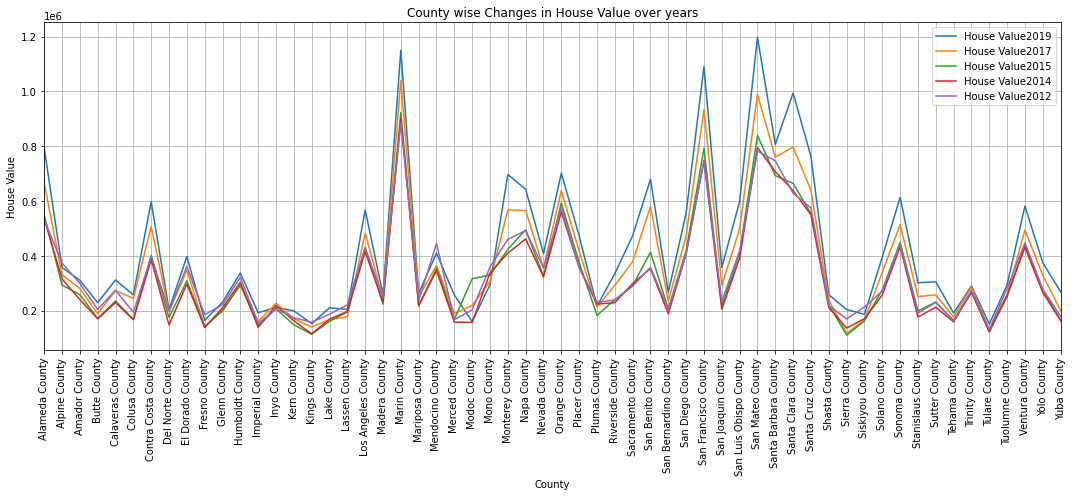

In [61]:
x_values=np.arange(0,len(counties),1)
county_combined_house_value=county_combined[["House Value2019","House Value2017",
                                             "House Value2015","House Value2014","House Value2012"]]

county_combined_house_value.plot.line(xticks=x_values,rot=90,grid=True,figsize=(15,7))
plt.xlim(0,57)
plt.xlabel("County")
plt.ylabel("House Value")
plt.title("County wise Changes in House Value over years")
plt.tight_layout()
plt.plot()

### *Change in Monthly Owner Cost in CA counties in years*

[]

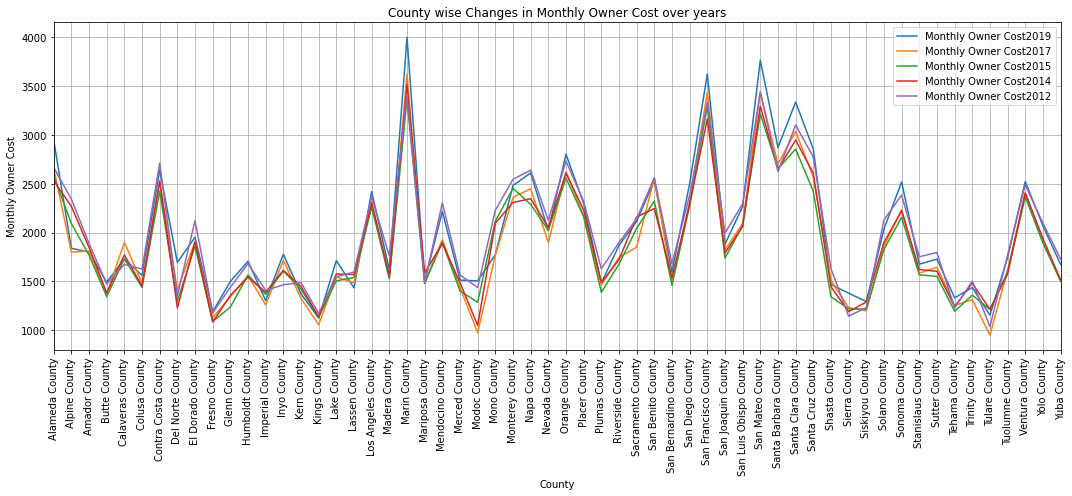

In [62]:
x_values=np.arange(0,len(counties),1)
county_combined_monthly_cost=county_combined[["Monthly Owner Cost2019","Monthly Owner Cost2017",
                                             "Monthly Owner Cost2015","Monthly Owner Cost2014",
                                             "Monthly Owner Cost2012"]]
                                             
county_combined_monthly_cost.plot.line(xticks=x_values,rot=90,grid=True,figsize=(15,7))
plt.xlim(0,57)
plt.xlabel("County")
plt.ylabel("Monthly Owner Cost")
plt.title("County wise Changes in Monthly Owner Cost over years")
plt.tight_layout()
plt.plot()

### *Change in monthly rent in CA counties in years*

[]

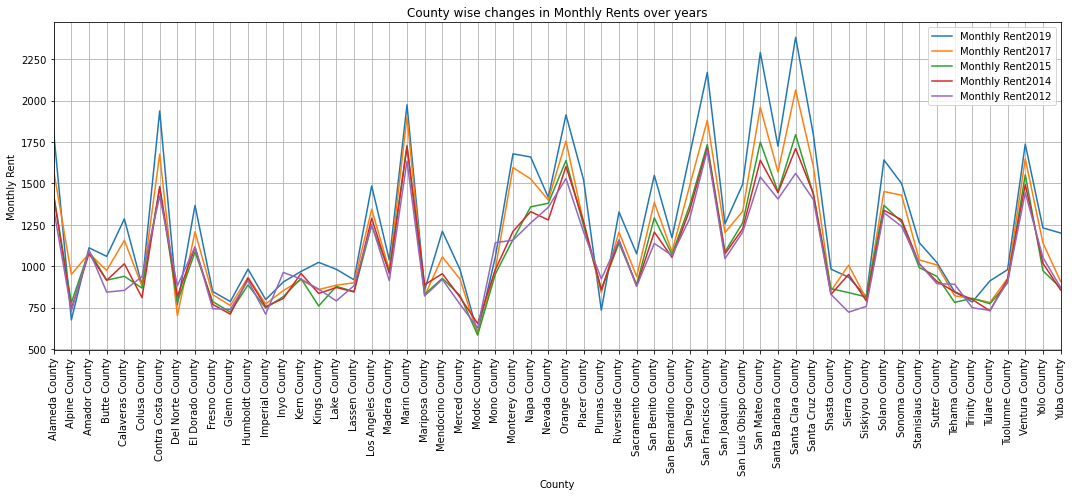

In [63]:
x_values=np.arange(0,len(counties),1)
county_combined_monthly_cost=county_combined[["Monthly Rent2019",'Monthly Rent2017','Monthly Rent2015',
                                              'Monthly Rent2014','Monthly Rent2012']]
                                             
county_combined_monthly_cost.plot.line(xticks=x_values,rot=90,grid=True,figsize=(15,7))
plt.xlim(0,57)
plt.xlabel("County")
plt.ylabel("Monthly Rent")
plt.title("County wise changes in Monthly Rents over years")
plt.tight_layout()
plt.plot()

### *Showing Top 15 Cities Accross California*

In [70]:
city_data=ca_2019_data[['Zipcode', 'City', 'County', 'Lat', 'Lng','House Value','Household Income','Population',
       'Poverty Rate', 'Unemployment Rate','Monthly Owner Cost', 'Monthly Rent','Public Transport Rate', 'Uneducated Rate', 
        'Median Age','Per Capita Income','College Rate']]

##filtering data for negative entries
filt=city_data[['House Value','Household Income','Population','Poverty Rate', 'Unemployment Rate','Monthly Owner Cost',
                'Monthly Rent','Public Transport Rate', 'Uneducated Rate', 'Median Age','Per Capita Income','College Rate']]>0
city_data=city_data[filt.all(1)]


In [75]:
#using groupby method to groupby the data according to city
d1=city_data.groupby('City').agg({'House Value': 'mean',
                           'Household Income': 'mean',
                            'Population': 'sum',
                            'Poverty Rate': 'mean', 
                            'Unemployment Rate': 'mean',
                            'Monthly Owner Cost': 'mean', 
                            'Monthly Rent': 'mean',
                            'Public Transport Rate': 'mean', 
                            'Uneducated Rate': 'mean', 
                            'Per Capita Income': 'mean',
                            'College Rate': 'mean'}).reset_index()

#getting nlargest and nsmallest of all columns and selecting their city as a list
   
HV=d1.nsmallest(50, 'House Value')
HV_City=HV['City'].tolist()

UR=d1.nsmallest(50, 'Unemployment Rate')
UR_City=UR['City'].tolist()

PTR=d1.nlargest(50, 'Public Transport Rate')
PTR_City=PTR['City'].tolist()

PR=d1.nsmallest(50, 'Poverty Rate')
PR_City=PR['City'].tolist()

UEDR=d1.nsmallest(50, 'Uneducated Rate')
UEDR_City=UEDR['City'].tolist()

MR=d1.nsmallest(50,'Monthly Rent')
MR_City=MR['City'].tolist()

MOC=d1.nsmallest(50,'Monthly Owner Cost')
MOC_City=MOC['City'].tolist()

PCI=d1.nlargest(50,'Per Capita Income')
PCI_City=PCI['City'].tolist()

CR=d1.nsmallest(50,'College Rate')
CR_City=CR['City'].tolist()

HI=d1.nlargest(50,'Household Income')
HI_City=HI['City'].tolist()
    
#Adding  Cities from above lists to see which city is occuring most

ALL_City=HV_City + UR_City + PTR_City + PR_City + UEDR_City + MR_City + MOC_City + PCI_City + CR_City + HI_City

#Using counter to see which city occurs most in ALL_City list

Cities=[]
city_counter=Counter(ALL_City)
Best_City=city_counter.most_common(15)

Cities.append(Best_City)
    
print(Cities)

[[('Mill Valley', 6), ('Alamo', 5), ('Portola Valley', 5), ('Orinda', 5), ('San Anselmo', 5), ('Trona', 4), ('Maricopa', 4), ('Thermal', 4), ('Clearlake', 4), ('Barstow', 4), ('Westmorland', 4), ('Lamont', 4), ('Ivanhoe', 4), ('Taft', 4), ('Earlimart', 4)]]


In [80]:
top_15_cities=[]
for item in Cities[0]:
    city=item[0]
    top_15_cities.append(city)
    
top_15_cities

['Mill Valley',
 'Alamo',
 'Portola Valley',
 'Orinda',
 'San Anselmo',
 'Trona',
 'Maricopa',
 'Thermal',
 'Clearlake',
 'Barstow',
 'Westmorland',
 'Lamont',
 'Ivanhoe',
 'Taft',
 'Earlimart']

In [105]:
# Seeing all counties in CA
city_data["County"].value_counts()

Los Angeles County        264
Orange County              77
San Diego County           77
Riverside County           56
Santa Clara County         54
San Bernardino County      50
Alameda County             47
Sacramento County          44
Contra Costa County        34
Fresno County              28
Kern County                25
San Francisco County       24
San Mateo County           24
San Joaquin County         23
Ventura County             21
Sonoma County              19
Stanislaus County          17
Monterey County            16
Santa Barbara County       15
Placer County              14
Santa Cruz County          14
San Luis Obispo County     12
Tulare County              12
Marin County               12
Solano County              11
Butte County                9
El Dorado County            8
Merced County               8
Humboldt County             8
Yolo County                 8
Shasta County               7
Napa County                 7
Imperial County             5
Amador Cou

### *Showing Best Cities in LA counties*

In [99]:
filt=city_data["County"]=="Los Angeles County"

LA_data=city_data.loc[filt,:]

In [102]:
#using groupby  method to find best cities in LA county

d1=LA_data.groupby('City').agg({'House Value': 'mean',
                           'Household Income': 'mean',
                            'Population': 'sum',
                            'Poverty Rate': 'mean', 
                            'Unemployment Rate': 'mean',
                            'Monthly Owner Cost': 'mean', 
                            'Monthly Rent': 'mean',
                            'Public Transport Rate': 'mean', 
                            'Uneducated Rate': 'mean', 
                            'Per Capita Income': 'mean',
                            'College Rate': 'mean'}).reset_index()


#getting nlargest and nsmallest of all columns and selecting their city as a list
   
HV=d1.nsmallest(50, 'House Value')
HV_City=HV['City'].tolist()

UR=d1.nsmallest(50, 'Unemployment Rate')
UR_City=UR['City'].tolist()

PTR=d1.nlargest(50, 'Public Transport Rate')
PTR_City=PTR['City'].tolist()

PR=d1.nsmallest(50, 'Poverty Rate')
PR_City=PR['City'].tolist()

UEDR=d1.nsmallest(50, 'Uneducated Rate')
UEDR_City=UEDR['City'].tolist()

MR=d1.nsmallest(50,'Monthly Rent')
MR_City=MR['City'].tolist()

MOC=d1.nsmallest(50,'Monthly Owner Cost')
MOC_City=MOC['City'].tolist()

PCI=d1.nlargest(50,'Per Capita Income')
PCI_City=PCI['City'].tolist()

CR=d1.nsmallest(50,'College Rate')
CR_City=CR['City'].tolist()

HI=d1.nlargest(50,'Household Income')
HI_City=HI['City'].tolist()

#Adding  Cities from above lists to see which city is occuring most

ALL_City=HV_City + UR_City + PTR_City + PR_City + UEDR_City + MR_City + MOC_City + PCI_City + CR_City + HI_City

#Using counter to see which city occurs most in ALL_City list

Cities=[]
city_counter=Counter(ALL_City)
Best_City=city_counter.most_common(10)

Cities.append(Best_City)
    
print(Cities)


[[('Acton', 8), ('Lancaster', 6), ('San Fernando', 6), ('Pico Rivera', 6), ('Castaic', 6), ('Lawndale', 6), ('Lakewood', 6), ('South Pasadena', 6), ('Culver City', 6), ('Paramount', 5)]]


In [104]:
top_10_cities=[]
for item in Cities[0]:
    city=item[0]
    top_10_cities.append(city)
    
top_10_cities

['Acton',
 'Lancaster',
 'San Fernando',
 'Pico Rivera',
 'Castaic',
 'Lawndale',
 'Lakewood',
 'South Pasadena',
 'Culver City',
 'Paramount']

### *Showing Best Cities in Orange County*

In [ ]:
## GENERATE FOR OTHER COUNTIES